# Лабораторная №1. Основый предобработки данных 
### Темнова Дарина, Остренко Таисия

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
<i>num_dependents</i>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
<i>credit_amount</i>
4. В каком классе больше всего skilled работников?<br>
<i>good</i>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
<i>Признаки с выбросами: credit_amount, age, duration</i>
6. Сколько пропущенных значений в наборе?<br>
<i>В признаке housing 27 пропущенных значений</i>
7. Попытайтесь заполнить пропущенные значения.<br>
<i>Выполнена замена значений NaN на случайные значения из списка возможных</i>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [3]:
path=''
credit_df = pd.read_csv('credit.csv', index_col=0)
#вопрос 1

1. Сhecking_status - порядковая ! (качественный)
2. Duration - абсолютная (количественный)
3. Credit_history - номинальная (качественный)
4. Purpose - номинальная (качественный)
5. Сredit_amount - абсолютная (количественный)
6. Savings_status - номинальная ! (качественный)
7. Employment - порядковая (качественный)
8. Personal_status - номинальная (качественный)
9. Property_magnitude - номинальная (качественный)
10. Age - абсолютная (количественный)
11. Housing - номинальная (качественный)
12. Existing_credits - абсолютная  (количественный)
13. Job - номинальная качественный
14. Num_dependents - абсолютная (количественный)
15. Foreign_worker - номинальная (бинарный)
16. Class - номинальная (бинарный)

In [8]:
credit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0<=X<200,36.0,existing paid,furniture/equipment,9034.0,100<=X<500,<1,male single,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,bad
497,no checking,24.0,critical/other existing credit,furniture/equipment,1585.0,<100,4<=X<7,male single,life insurance,40.0,own,2.0,skilled,1.0,yes,good
498,0<=X<200,18.0,existing paid,radio/tv,0.0,<100,>=7,male mar/wid,real estate,32.0,own,1.0,unskilled resident,1.0,yes,good
499,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,male div/sep,car,28.0,own,2.0,skilled,2.0,yes,good


In [27]:
credit_df.describe()

,duration,credit_amount,age,existing_credits,num_dependents
count,501.000,501.000,501.000,501.000,501.000
mean,20.315,3046.218,35.605,1.393,1.144
std,12.103,2382.086,11.740,0.568,0.351
min,4.000,518.000,15.000,1.000,1.000
25%,12.000,1288.000,27.000,1.000,1.000
50%,18.000,2197.000,33.000,1.000,1.000
75%,24.000,3915.000,42.000,2.000,1.000
max,60.000,9055.000,89.000,4.000,2.000


In [23]:
#вопрос 2
credit_df.var()
#дисперсия - это std*std => num_dependents обладает наименьшей дисперсией

duration            1.465e+02
credit_amount       2.657e+07
age                 1.378e+02
existing_credits    3.231e-01
num_dependents      1.233e-01
dtype: float64

In [12]:
#вопрос 3
credit_df.groupby('class').mean()

,duration,credit_amount,age,existing_credits,num_dependents
class,,,,,
bad,25.255,4806.358,35.029,1.380,1.153
good,18.456,2794.648,35.821,1.398,1.140


In [22]:
#вопрос 4
credit_df[credit_df['job']=='skilled'].groupby('class').count()['job']

class
bad      80
good    232
Name: job, dtype: int64

### Поиск выбросов

<AxesSubplot:>

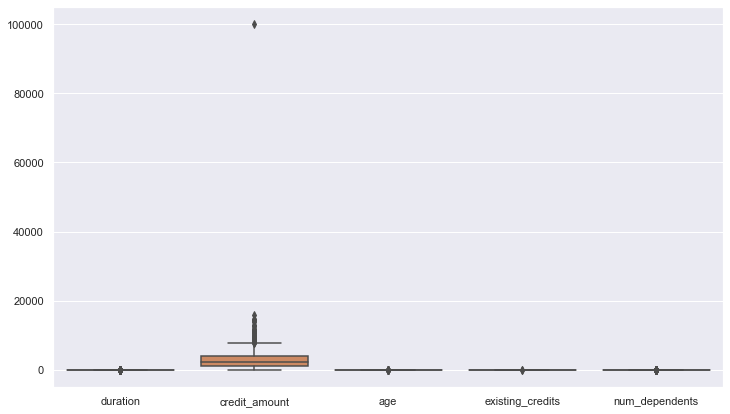

In [8]:
#вопрос 5
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)

Из-за большой разницы значений credit_amount на общем графике плохо видно остальные признаки. Поэтому имеет смысл рассмотреть отдельные группы

<AxesSubplot:>

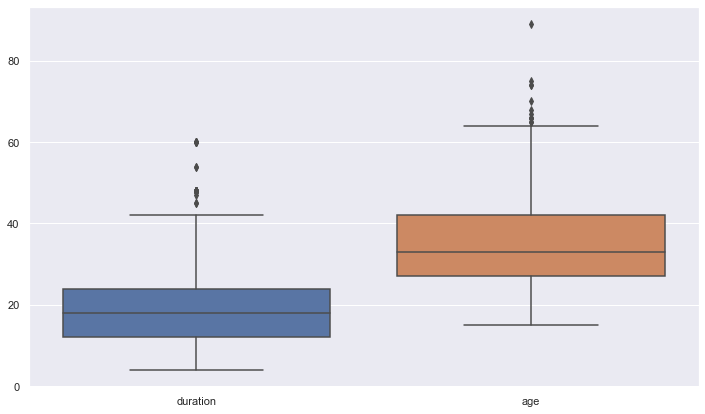

In [20]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df.loc[:,['duration', 'age']])

Выбросы есть у обоих признаков.

<AxesSubplot:>

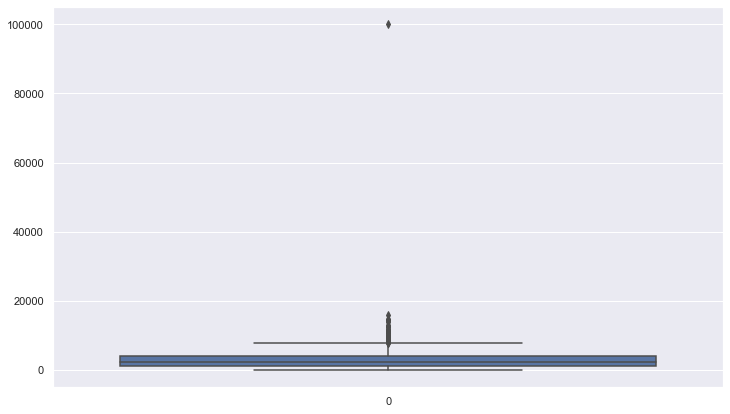

In [22]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df['credit_amount'])

In [23]:
credit_df['credit_amount'] = credit_df.credit_amount.clip(lower=credit_df.credit_amount.quantile(0.05), 
                                                  upper=credit_df.credit_amount.quantile(0.95))

<AxesSubplot:>

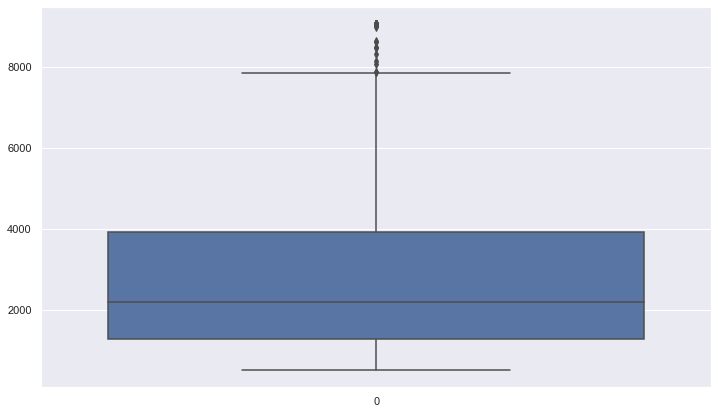

In [24]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df['credit_amount'])

Выбросы есть

### Обработка пропусков

In [31]:
no_zero_columns = list (set(credit_df.columns) -  set(['duration','credit_amount','age']))

In [32]:
#вопрос 6
credit_df.isnull().sum()

checking_status        0
duration               0
credit_history         0
purpose                0
credit_amount          0
savings_status         0
employment             0
personal_status        0
property_magnitude     0
age                    0
housing               27
existing_credits       0
job                    0
num_dependents         0
foreign_worker         0
class                  0
dtype: int64

Заполнить пропуски можно разными способами, для данного признака мы решили заполнить их случайными значениями из возможных ('own', 'rent', 'for free')

In [40]:
#вопрос 7
import random
list_housing = ['own', 'for free', 'rent']
credit_df['housing'].fillna(random.choice(list_housing), inplace = True)

In [41]:
credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
purpose               0
credit_amount         0
savings_status        0
employment            0
personal_status       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
foreign_worker        0
class                 0
dtype: int64

In [42]:
credit_df['housing'].value_counts()

own         342
rent         82
for free     77
Name: housing, dtype: int64